# Vascular cell type marker genes
### An organotypic atlas of human vascular cells

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import os
import anndata
import harmonypy as hm
import seaborn as sns

In [2]:
import matplotlib
from matplotlib import colors
from matplotlib import colors
from matplotlib import rcParams
from matplotlib.pyplot import rc_context
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

In [3]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                         9.2.0
anndata                     0.8.0
asciitree                   NA
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
cffi                        1.15.1
cloudpickle                 2.0.0
colorama                    0.4.5
comm                        0.2.1
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.11.0
dask                        2022.7.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
fasteners                   0.18
fsspec                      2022.7.1
h5py                        3.7.0
harmonypy                   NA
hypergeom_ufunc             NA
igraph                      0.9

In [4]:
sc.settings.set_figure_params(dpi=150,fontsize=15)

In [5]:
adata_orig = sc.read_h5ad('/rds/general/user/snb20/projects/cardiac_single_cell_biology/live/Endothelial_datasets/paper_revision/final_vas_cells_july2024.h5ad')

In [6]:
adata = adata_orig

In [7]:
adata

AnnData object with n_obs × n_vars = 66623 × 30021
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pv

In [8]:
littoral_markers = ["PECAM1","VWF","CDH5","SEMA3G","RGCC","ACKR1","PROX1","LYVE1","CD8A","KAZN","PTPRH","GSDMC","TMEM171","SERPINA5","SLIT2","LILRB5","PCSK6","PSTPIP2","LSP1","HSD17B6","DHCR24","NR5A1","MYH11","KCNJ8"]

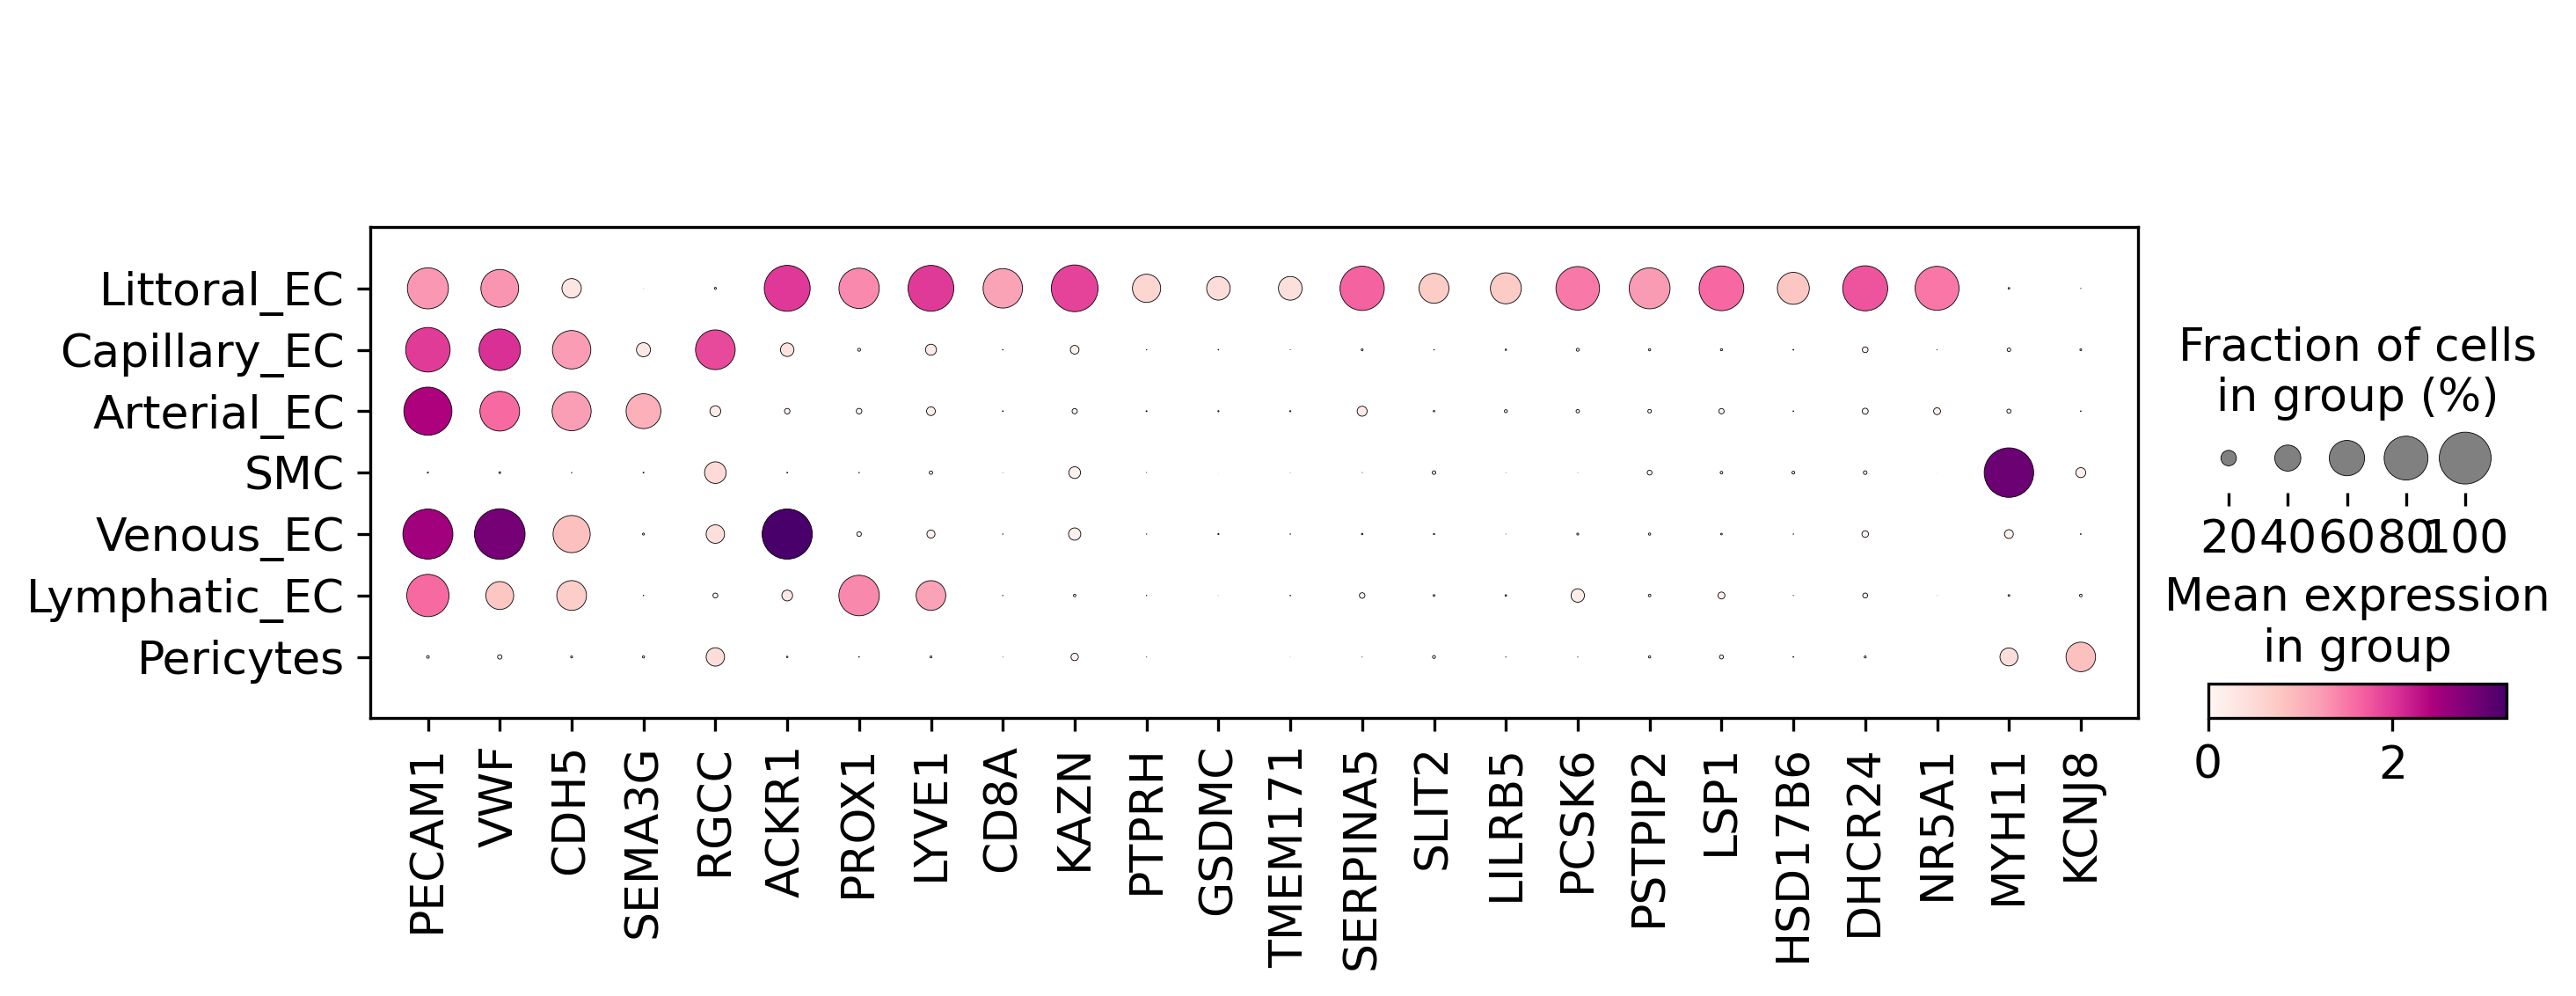

In [9]:
sc.pl.dotplot(adata, littoral_markers, "ann_vas_mid_final", cmap = 'RdPu')

In [30]:
adata.obs['ann_final'] = adata.obs['ann_final'].replace('Littoral_EC', 'littoral_ec')

In [31]:
adata.obs['ann_final'] = adata.obs['ann_final'].cat.reorder_categories(["aorta_coronary_ec","art_ec_1","art_ec_2","brain_art_ec","kidney_art_ec","spleen_art_ec","pul_art_ec","ven_ec_1","ven_ec_2","pul_ven_ec","brain_ven_ec","endocardial_ec","littoral_ec","cap_ec","aerocyte_ec","pul_cap_ec","pul_tip_cap_ec","periportal_cap_ec","pericentral_cap_ec","kidney_cap_ec","glomeruli_ec","endometrium_cap_ec","myo_cap_ec","adip_cap_ec","blood_brain_barrier_ec","cap_lec","bridging_lec","ceiling_lec","floor_lec","perifollicular_sinus_lec","valve_up_lec","valve_down_lec","aorta_coronary_smc","art_smc","brain_art_smc","pul_smc","uterine_smc","cap_pc","pul_pc","uterine_pc","smc_pc_intermediate","ven_smc"])

In [ ]:
broad_vasc_markers = {
    'Endothelial': ["PECAM1","VWF","CDH5","FLT1","CLDN5","EGFL7","ADGRL4","CLEC14A","PTPRB","LDB2"],
    'EC/Mural': ["TINAGL1","BCAM","LAMA5","ESAM","A2M","SNCG","CRIM1","CRIP2","CAV2"],
    'Mural': ["TAGLN","ACTA2","PDGFRB","RGS5","CNN1","RCAN2","PLN","NDUFA4L2","MYLK","NOTCH3","MYH11","LMOD1","CARMN","GUCY1A1","ISYNA1","KCNJ8","HIGD1B","ABCC9","AGT"],
    'LEC': ["PROX1","LYVE1","CCL21","MMRN1","PDPN","TFF3","FLT4"]   
}

In [ ]:
adata

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     'Arterial_EC': 'Blood_EC',
     'Capillary_EC': 'Blood_EC',
     'Venous_EC': 'Blood_EC',
     'Littoral_EC': 'Littoral_EC',
     'Lymphatic_EC': 'Lymphatic_EC',
     'Pericytes': 'Mural',
     'VSMC': 'Mural',
}
# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['ann_vas_broad_final'] = adata.obs['ann_vas_mid_final'].map(cluster2annotation).astype('category')

In [ ]:
blood_ec = adata[adata.obs["ann_vas_broad_final"].isin(["Blood_EC","Littoral_EC"])]
mural = adata[adata.obs["ann_vas_broad_final"].isin(["Mural"])]
lymphatic_ec = adata[adata.obs["ann_vas_broad_final"].isin(["Lymphatic_EC"])]

In [ ]:
sc.pl.dotplot(blood_ec, broad_vasc_markers, "organ_uni", use_raw = False)
#sc.pl.umap(adata, color = "ann_vas_broad_final", groups = ["Blood_EC"])
sc.pl.dotplot(mural, broad_vasc_markers, "organ_uni", use_raw = False)
#sc.pl.umap(adata, color = "ann_vas_broad_final", groups = ["Mural"])
sc.pl.dotplot(lymphatic_ec, broad_vasc_markers, "organ_uni", use_raw = False)
#sc.pl.umap(adata, color = "ann_vas_broad_final", groups = ["Lymphatic_EC"])

In [ ]:
sc.pl.dotplot(blood_ec, broad_vasc_markers, "ann_final", use_raw = False)
sc.pl.dotplot(mural, broad_vasc_markers, "ann_final", use_raw = False)
sc.pl.dotplot(lymphatic_ec, broad_vasc_markers, "ann_final", use_raw = False)

In [ ]:
adata.obs['ann_vas_mid_final'] = adata.obs['ann_vas_mid_final'].replace('SMC', 'VSMC')

In [ ]:
adata.obs['ann_vas_mid_final'] = adata.obs['ann_vas_mid_final'].cat.reorder_categories(["Arterial_EC","Capillary_EC","Venous_EC","Littoral_EC","Lymphatic_EC","VSMC","Pericytes"])

In [ ]:
cell_type_markers = {
    'pan-ec': ["PECAM1","VWF","CDH5"],
    'Arterial.EC': ["SEMA3G","GJA5","HEY1"],
    'Capillary.EC': ["RGCC","GPIHBP1","CA4"],
    'Venous.EC': ["ACKR1","POSTN","SELE"],
    'Littoral.EC': ["CD8A","ACKR1","FHOD1"],
    'Lymphatic.EC': ["PROX1","PDPN","CCL21"],
    'pan-mural': ["ACTA2","NOTCH3","PDGFRB"],
    'vSMC': ["MYH11","CNN1","PLN"],
    'Pericytes': ["ABCC9","KCNJ8","RGS5"],
}

sc.pl.dotplot(adata, cell_type_markers, "ann_vas_mid_final", cmap = 'Reds')

In [ ]:
all_markers = {
    'misc': ["TMEM88","CLEC14A","EGFL7"],
    'pan_ec': ["PECAM1","VWF","CDH5","EGFL7"],
    'pan_art_markers': ["SEMA3G","HEY1","DLL4","GJA5"],
    'aorta_coronary_ec': ["BGN","OMD","OGN","EFEMP1"],
    'art_ec_1': ["ELN","SULF1","COL8A1","ABI3BP","GUCY1A1","SSTR1"],
    'art_ec_2': ["NEBL","NTRK2","ALPL"],
    'brain_art_ec': ["DKK2","ROR1","EFNA5","SLC4A4"],
    'kidney_art_ec': ["PI16","CHRM3","SLC6A6"],
    'spleen_art_ec': ["SERPINA5","NR5A1","NOX5"],
    'pul_art_ec': ["DKK2","NPR3","VIPR1","NOS1"],
    'pan_venous_markers': ["ACKR1","NR2F2","PLVAP","POSTN","COL15A1"],
    'ven_ec_1': ["POSTN","C7","SELP"],
    'ven_ec_2': ["SELE","ICAM4","CSF3","PCDH19"],
    'pul_ven_ec': ["PLA1A","PTGDS","HDAC9","IL7R"],
    'brain_ven_ec': ["ADGRL3","SH3RF3","CDH23","TRPM6"],
    'endocardial_ec': ["SMOC1","INHBA","CGNL1"],
    'aerocyte_ec': ["FOXF1","HPGD","EDNRB","SOSTDC1"],
    'pul_cap_ec': ["SLC6A4","IL7R"],
    'pul_tip_cap_ec': ["PGF","CXCR4","ESM1","CYTL1"],
    'periportal_cap_ec': ["MGP","AQP1","CLEC14A","NFATC1","PDE4B","MEG3"],
    'pericentral_cap_ec': ["CLEC1B","CLEC4G","CLEC4M","FCN2","MAF","NR2F1","CD4"],
    'kidney_cap_ec': ["IGFBP5","CEACAM1"],
    'glomeruli_ec': ["EHD3","MEG3","SOST"],
    'endometrium_cap_ec': ["APCDD1","SNCA","HOXD9"],
    'myo_cap_ec': ["FABP5","MEOX2","TCF15"],
    'adip_cap_ec': ["LIPE","ACACB","PPARG"],
    'blood_brain_barrier_ec': ["MFSD2A","SLCO1A2","SLC38A3","SLC7A8"],
    'pan_mural': ["PDGFRB","NOTCH3","TPM2"],
    'smc_markers': ["MYH11","PLN","LMOD1"],
    'aorta_coronary_smc': ["ADH1B","THBS2"],
    'art_smc': ["RERGL","CASQ2","KCNAB1"],
    'brain_art_smc': ["PDE4D","MUSTN1","SIK3","SOX5"],
    'pul_mural': ["TCF21","EGFL6","PERP"],
    'pul_smc': ["ELN","LTBP2","MYH10","FST"],
    'ven_smc': ["PRUNE2","HMCN2","FLNC","CYFIP2"],
    'pc_markers': ["RGS5","ABCC9","KCNJ8","HIGD1B"],
    'cap_pc': ["AGT","CYGB"],
    'pul_pc': ["PTN","KCNK3","LAMC3"],
    'uterine_pc': ["LY6E","IFI6","LUM","IFI27"],
    'uterine_smc': ["HOPX","APCDD1","PTN","NREP"],
    'ven_smc_pc': ["STEAP4","PROCR","FGF7","CLSTN2"],
    'pan_lec': ["PROX1","TFF3"],
    'lec_cap': ["LYVE1","PDPN","EEF1G","PLA1A","C7"],
    'blec/clec': ["ACKR4","TMEM100","THBS4","PCDH15","SCUBE2"],
    'flec/pfslec': ["CCL14","CLEC4M","CLEC4G","LYZ","CXCL3","PLVAP","THY1","MARCO","CD209","LGMN"],
    'vlec_up/down': ["CLDN11","NEO1","CD24","GJA4","SCG3","DEGS2","HGF"],
    'littoral_ec': ["CD8A","KAZN","SERPINA5","NR5A1"]
        
    
    
}

In [ ]:
sc.pl.matrixplot(adata, all_markers, "ann_final", cmap = 'Reds', standard_scale = 'var')

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='ann_final', method='wilcoxon',corr_method='benjamini-hochberg', pts = True) #change grouby accordingly. Change n_genes accordingly to the number of DE genes you want

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes = 3, groupby = 'ann_final', dendrogram = False)

In [11]:
adata.obs['ann_final'] = adata.obs['ann_final'].replace('Littoral_EC', 'littoral_ec')

In [12]:
df = adata.obs[['ann_final','organ_uni']]

In [13]:
adata

AnnData object with n_obs × n_vars = 66623 × 30021
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pv

In [14]:
count_table = pd.pivot_table(df, index='ann_final', columns='organ_uni', aggfunc=len, fill_value=0)
count_table#.to_csv("")
# contingency_table = pd.crosstab(df['A'], df['B'])

organ_uni,adipose_tissue,bladder,brain,decidua,heart,kidney,large_intestine,large_vessels,liver,lung,lymph_node,muscle,oesophagus,pancreas,small_intestine,spleen,thymus,trachea,uterus
ann_final,,,,,,,,,,,,,,,,,,,
littoral_ec,0,0,1,4,1,5,0,0,70,2,0,209,0,0,1,4551,0,0,1
adip_cap_ec,1231,1,0,0,3,1,4,9,0,2,129,31,0,0,3,0,461,4,0
aerocyte_ec,0,1,0,0,0,0,1,0,0,948,0,0,0,1,0,1,0,0,0
aorta_coronary_ec,0,0,0,0,1,1,0,117,0,14,0,0,0,0,0,1,3,1,0
aorta_coronary_smc,0,3,7,1,13,1,0,1393,0,31,1,0,0,0,0,0,3,1,7
art_ec_1,12,9,13,1,58,18,130,21,3,11,30,39,46,21,262,23,101,26,34
art_ec_2,148,19,3,5,537,75,58,76,9,18,331,253,69,18,115,108,184,105,84
art_smc,391,585,2180,1,667,49,214,211,7,65,304,3087,57,25,352,49,461,293,1132
blood_brain_barrier_ec,0,0,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#only relevant if subsetting to a minimum number of cells / group to be included in the compositional analysis, otherwise ignore. Here, any organ/state with less than 10 cells is removed (changed to zero)
count_table = count_table.where(count_table >= 10, 0)

In [16]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(count_table)

enrichment_table = pd.DataFrame(count_table.values / expected, index=count_table.index, columns=count_table.columns)

# print(f"Chi-square test statistic: {chi2:.4f}")
# print(f"P-value: {p_value:.4f}")
# print(f"Degrees of freedom: {dof}")
# print("Expected frequencies:")
# print(expected)
enrichment_table

organ_uni,adipose_tissue,bladder,brain,decidua,heart,kidney,large_intestine,large_vessels,liver,lung,lymph_node,muscle,oesophagus,pancreas,small_intestine,spleen,thymus,trachea,uterus
ann_final,,,,,,,,,,,,,,,,,,,
littoral_ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368407,0.000000,0.000000,0.326408,0.000000,0.000000,0.000000,11.355471,0.000000,0.000000,0.000000
adip_cap_ec,17.345086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.867722,0.126265,0.000000,0.000000,0.000000,0.000000,7.815165,0.000000,0.000000
aerocyte_ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.208112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aorta_coronary_ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.892505,0.000000,0.984073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aorta_coronary_smc,0.000000,0.000000,0.000000,0.000000,0.069924,0.000000,0.000000,28.103075,0.000000,0.198644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
art_ec_1,0.370582,0.000000,0.167420,0.000000,0.530530,0.767633,9.116942,0.720480,0.000000,0.119869,0.442279,0.348153,5.983440,1.016280,10.858338,0.328032,3.752692,2.192408,0.760581
art_ec_2,1.757088,0.652659,0.000000,0.000000,1.888363,1.229622,1.563734,1.002410,0.000000,0.075408,1.875996,0.868270,3.450414,0.334885,1.832268,0.592163,2.628260,3.403818,0.722395
art_smc,1.008022,4.363648,2.343751,0.000000,0.509329,0.174449,1.252882,0.604332,0.000000,0.059131,0.374144,2.300553,0.618954,0.101001,1.217854,0.058341,1.429923,2.062557,2.113992
blood_brain_barrier_ec,0.000000,0.000000,10.882314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
log1p_enrichment_table = np.log1p(enrichment_table)
log1p_enrichment_table

organ_uni,adipose_tissue,bladder,brain,decidua,heart,kidney,large_intestine,large_vessels,liver,lung,lymph_node,muscle,oesophagus,pancreas,small_intestine,spleen,thymus,trachea,uterus
ann_final,,,,,,,,,,,,,,,,,,,
littoral_ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.313647,0.000000,0.000000,0.282475,0.000000,0.000000,0.000000,2.514099,0.000000,0.000000,0.000000
adip_cap_ec,2.909362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.624719,0.118907,0.000000,0.000000,0.000000,0.000000,2.176474,0.000000,0.000000
aerocyte_ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.323183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aorta_coronary_ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.291848,0.000000,0.685152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aorta_coronary_smc,0.000000,0.000000,0.000000,0.000000,0.067588,0.000000,0.000000,3.370844,0.000000,0.181191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
art_ec_1,0.315235,0.000000,0.154796,0.000000,0.425614,0.569642,2.314211,0.542603,0.000000,0.113212,0.366224,0.298735,1.943542,0.701254,2.473031,0.283698,1.558711,1.160775,0.565644
art_ec_2,1.014175,0.502385,0.000000,0.000000,1.060690,0.801832,0.941465,0.694351,0.000000,0.072700,1.056399,0.625013,1.492997,0.288845,1.041078,0.465094,1.288753,1.482472,0.543716
art_smc,0.697150,1.679644,1.207093,0.000000,0.411665,0.160799,0.812210,0.472707,0.000000,0.057449,0.317831,1.194090,0.481780,0.096220,0.796540,0.056703,0.887860,1.119250,1.135905
blood_brain_barrier_ec,0.000000,0.000000,2.475051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
df1 = log1p_enrichment_table.loc[["aorta_coronary_ec","art_ec_1","art_ec_2","brain_art_ec","kidney_art_ec","spleen_art_ec","pul_art_ec","ven_ec_1","ven_ec_2","pul_ven_ec","brain_ven_ec","endocardial_ec","littoral_ec"]]

In [19]:
df1

organ_uni,adipose_tissue,bladder,brain,decidua,heart,kidney,large_intestine,large_vessels,liver,lung,lymph_node,muscle,oesophagus,pancreas,small_intestine,spleen,thymus,trachea,uterus
ann_final,,,,,,,,,,,,,,,,,,,
aorta_coronary_ec,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.291848,0.000000,0.685152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
art_ec_1,0.315235,0.000000,0.154796,0.0,0.425614,0.569642,2.314211,0.542603,0.000000,0.113212,0.366224,0.298735,1.943542,0.701254,2.473031,0.283698,1.558711,1.160775,0.565644
art_ec_2,1.014175,0.502385,0.000000,0.0,1.060690,0.801832,0.941465,0.694351,0.000000,0.072700,1.056399,0.625013,1.492997,0.288845,1.041078,0.465094,1.288753,1.482472,0.543716
brain_art_ec,0.000000,0.000000,2.475051,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kidney_art_ec,0.000000,0.000000,0.000000,0.0,0.000000,3.522130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.370078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
spleen_art_ec,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.962927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.508288,0.000000,0.000000,0.000000
pul_art_ec,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.323183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ven_ec_1,0.000000,0.450112,0.000000,0.0,0.540316,0.213024,2.254808,0.000000,0.000000,0.316749,1.426879,0.000000,2.490632,0.192010,2.429174,0.000000,0.610938,0.760830,0.178730
ven_ec_2,1.748421,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.449424,1.638150,0.000000,0.000000,0.000000,0.000000,0.000000,0.396271,0.000000


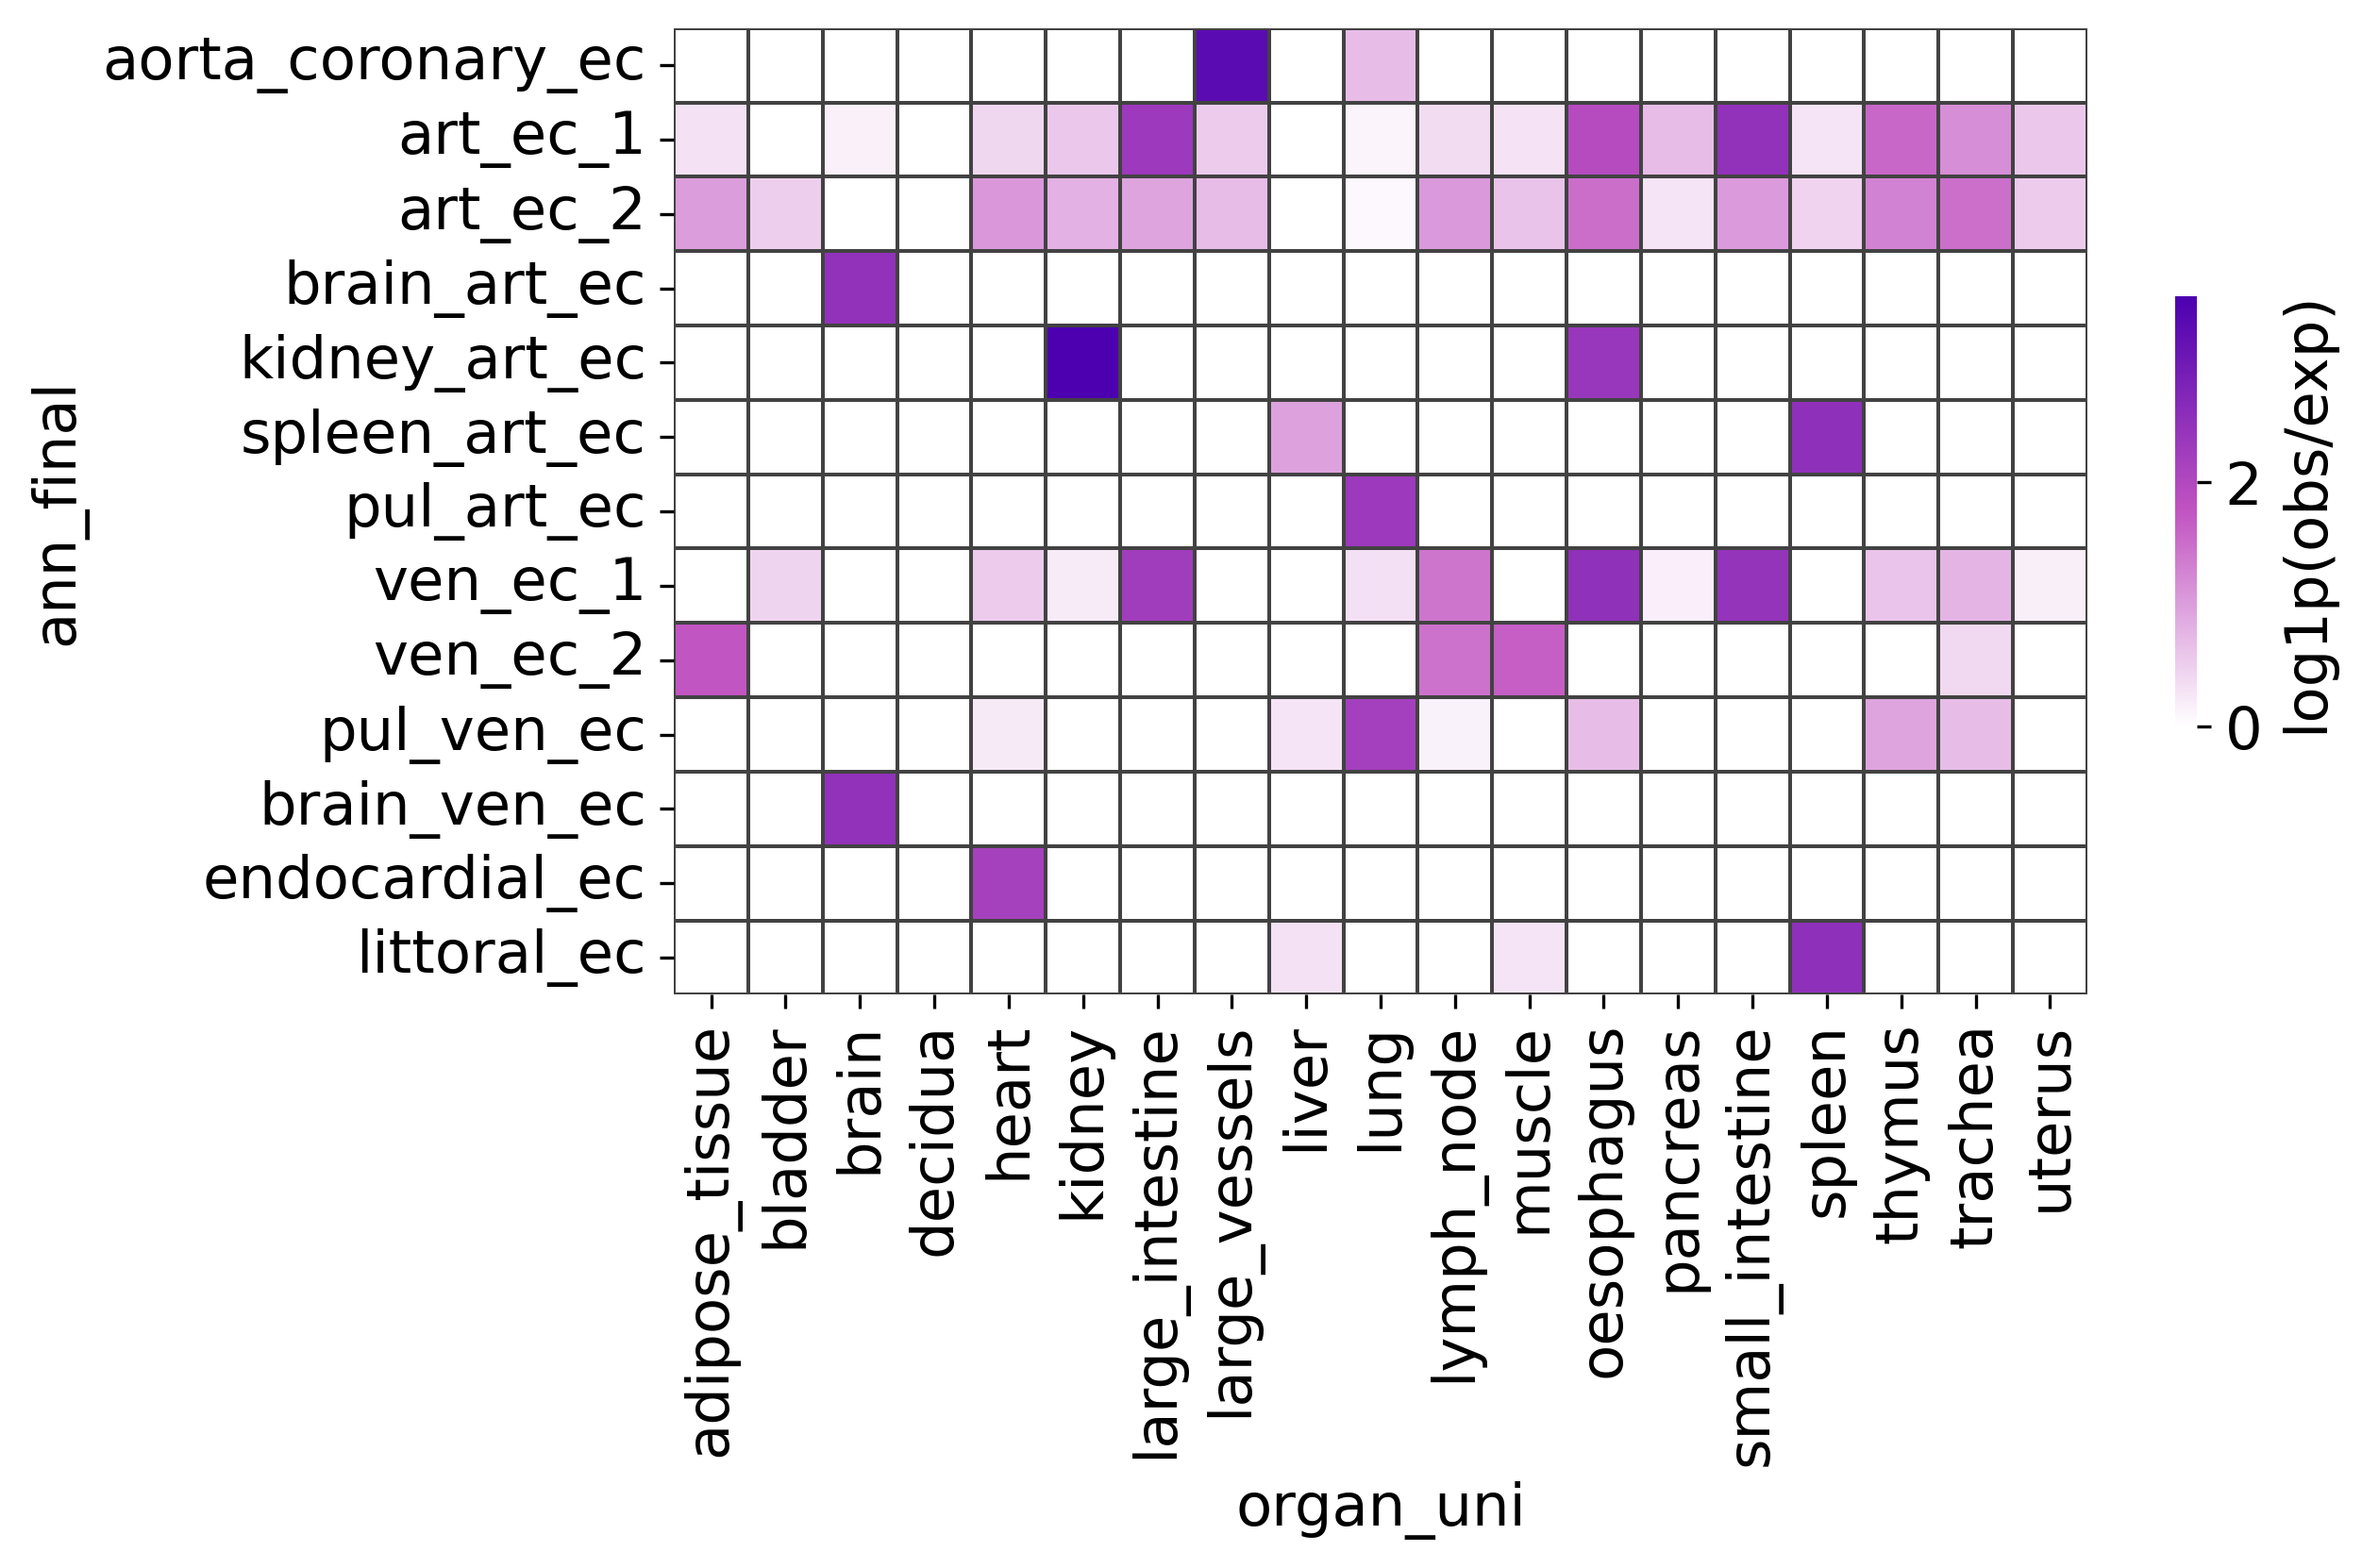

In [20]:
#organotypic art ec

from matplotlib.colors import ListedColormap

with rc_context({'figure.figsize': (8,8)}):
    sns.heatmap(df1,
                annot=False, fmt='g',
                square = True,
                cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['#ffffff', '#c154c1', '#4c00b0']),
                linewidths=0.5, linecolor='#424242',
                cbar_kws={"orientation": "vertical", "label": "log1p(obs/exp)", "shrink": 0.25})
    
    #plt.tick_params(axis='x', which='both', top=False, bottom=False, labeltop=False, labelbottom=False)
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['top'].set_edgecolor('black')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['bottom'].set_edgecolor('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['left'].set_edgecolor('black')
    ax.spines['right'].set_linewidth(2)
    ax.spines['right'].set_edgecolor('black')
    #ax.set_xticklabels([])
    
    plt.show()
    #plt.savefig('./figures/enrichment_ec_av_enrichment.png')

In [21]:
df2 = log1p_enrichment_table.loc[["cap_ec","aerocyte_ec","pul_cap_ec","pul_tip_cap_ec","periportal_cap_ec","pericentral_cap_ec","kidney_cap_ec","glomeruli_ec","endometrium_cap_ec","myo_cap_ec","adip_cap_ec","blood_brain_barrier_ec"]]

In [22]:
df2

organ_uni,adipose_tissue,bladder,brain,decidua,heart,kidney,large_intestine,large_vessels,liver,lung,lymph_node,muscle,oesophagus,pancreas,small_intestine,spleen,thymus,trachea,uterus
ann_final,,,,,,,,,,,,,,,,,,,
cap_ec,0.000000,0.705224,0.000000,0.000000,0.038849,0.141584,1.322102,0.204769,0.000000,0.211850,1.421538,0.000000,1.094664,2.910083,0.583240,0.076898,0.966233,1.119133,1.009347
aerocyte_ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.323183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pul_cap_ec,0.000000,0.000000,0.000000,0.000000,0.050028,0.000000,0.000000,0.000000,0.116650,2.301394,0.000000,0.000000,0.000000,0.000000,0.000000,0.051953,0.000000,0.449484,0.000000
pul_tip_cap_ec,0.000000,0.000000,0.000000,0.000000,0.131271,0.000000,0.000000,0.000000,0.000000,2.284802,0.257673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
periportal_cap_ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.200774,0.203447,0.000000,0.000000,0.000000,0.000000,0.000000,0.464102,0.000000,0.000000,0.000000
pericentral_cap_ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.274124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kidney_cap_ec,0.000000,0.000000,0.000000,0.000000,0.071555,3.434586,0.000000,0.348777,0.520621,0.139960,0.526746,0.000000,0.770253,0.000000,0.000000,0.129967,0.526507,0.000000,0.000000
glomeruli_ec,0.000000,0.000000,0.000000,0.000000,0.000000,3.579145,0.000000,0.000000,0.000000,0.141892,0.000000,0.000000,0.000000,0.000000,0.000000,0.181930,0.000000,0.000000,0.000000
endometrium_cap_ec,0.000000,0.000000,0.000000,2.717481,0.000000,0.000000,0.000000,0.000000,0.000000,0.111098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.087049


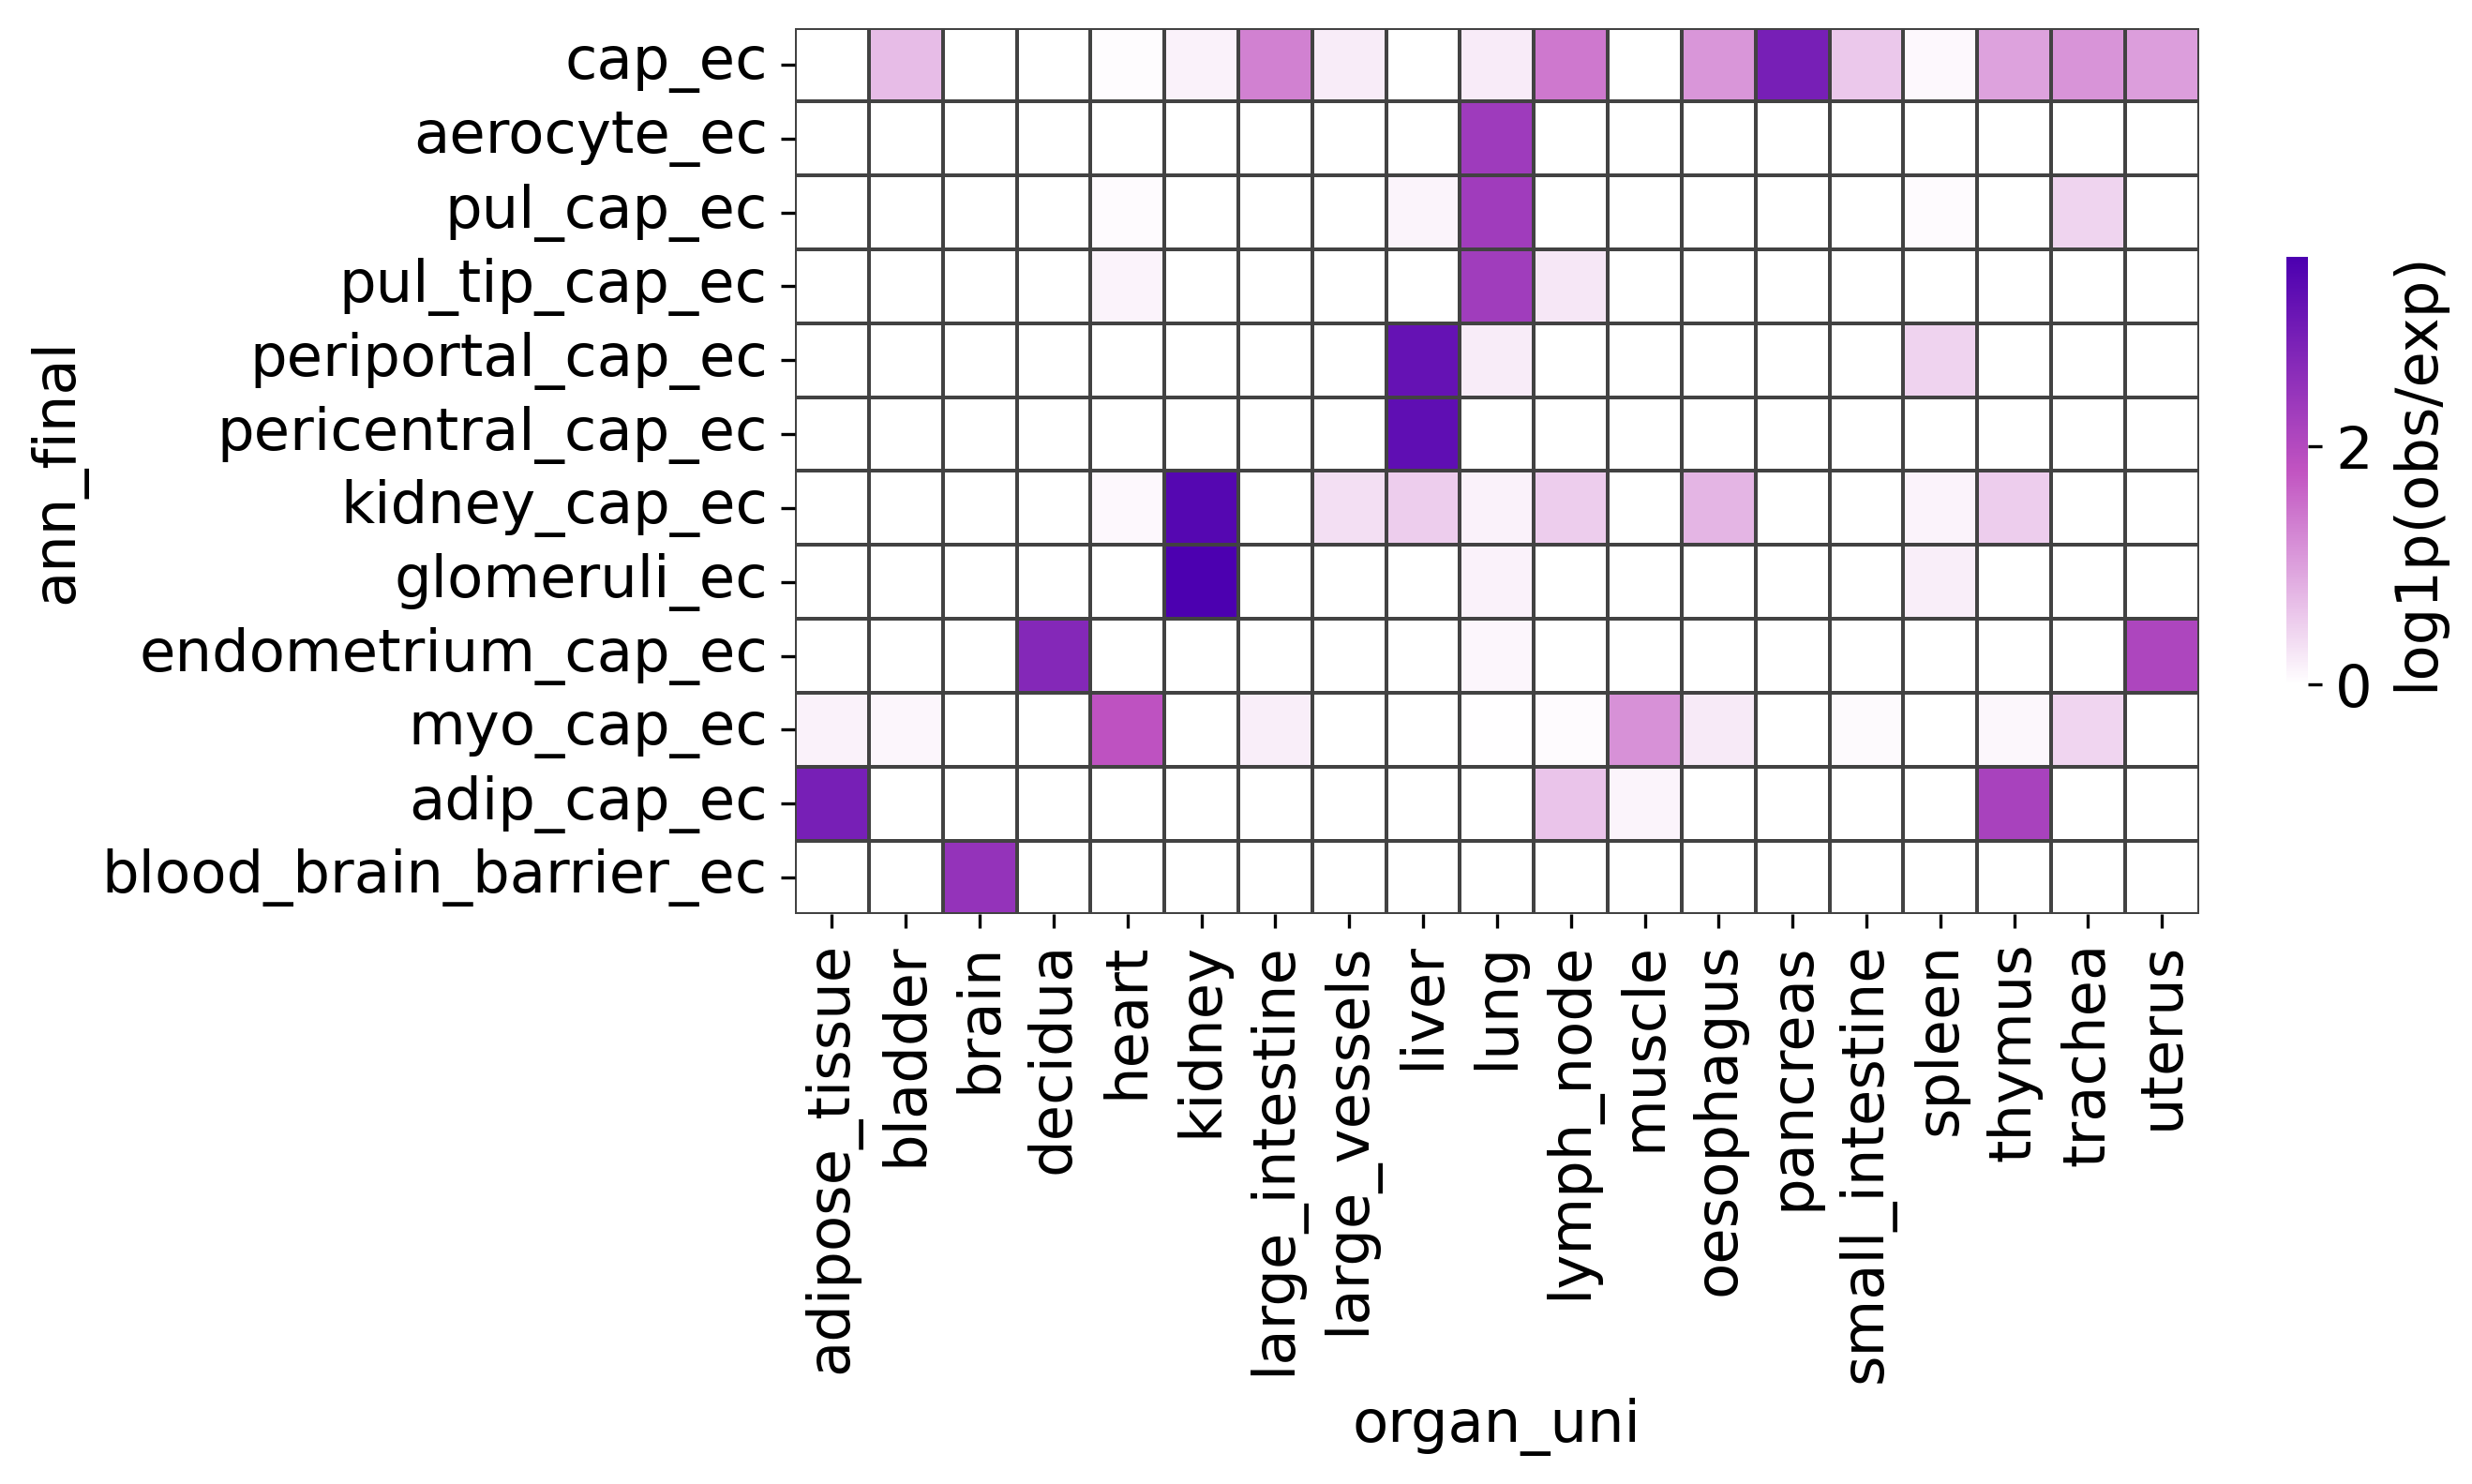

In [23]:
#organotypic art ec

from matplotlib.colors import ListedColormap

with rc_context({'figure.figsize': (8,8)}):
    sns.heatmap(df2,
                annot=False, fmt='g',
                square = True,
                cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['#ffffff', '#c154c1', '#4c00b0']),
                linewidths=0.5, linecolor='#424242',
                cbar_kws={"orientation": "vertical", "label": "log1p(obs/exp)", "shrink": 0.25})
    
    #plt.tick_params(axis='x', which='both', top=False, bottom=False, labeltop=False, labelbottom=False)
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['top'].set_edgecolor('black')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['bottom'].set_edgecolor('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['left'].set_edgecolor('black')
    ax.spines['right'].set_linewidth(2)
    ax.spines['right'].set_edgecolor('black')
    #ax.set_xticklabels([])
    
    plt.show()
    #plt.savefig('./figures/enrichment_ec_av_enrichment.png')

In [24]:
df3 = log1p_enrichment_table.loc[["cap_lec","bridging_lec","ceiling_lec","floor_lec","perifollicular_sinus_lec","valve_up_lec","valve_down_lec"]]

In [25]:
df3

organ_uni,adipose_tissue,bladder,brain,decidua,heart,kidney,large_intestine,large_vessels,liver,lung,lymph_node,muscle,oesophagus,pancreas,small_intestine,spleen,thymus,trachea,uterus
ann_final,,,,,,,,,,,,,,,,,,,
cap_lec,0.225919,0.988348,0.0,1.752294,0.079352,0.0,1.960317,0.301585,0.0,1.279220,0.841119,0.070712,1.410047,0.0,1.960940,0.0,0.322958,0.712054,0.152935
bridging_lec,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.246105,2.479259,0.000000,0.000000,0.0,0.439437,0.0,1.223050,0.000000,0.000000
ceiling_lec,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.551221,2.480194,0.000000,0.000000,0.0,0.899826,0.0,0.000000,0.000000,0.000000
floor_lec,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.599538,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
perifollicular_sinus_lec,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.599538,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
valve_up_lec,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.457696,0.000000,0.000000,0.0,1.792241,0.0,0.000000,0.000000,0.000000
valve_down_lec,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.846722,1.881416,0.667236,2.430905,0.0,1.459497,0.0,1.376727,0.000000,0.000000


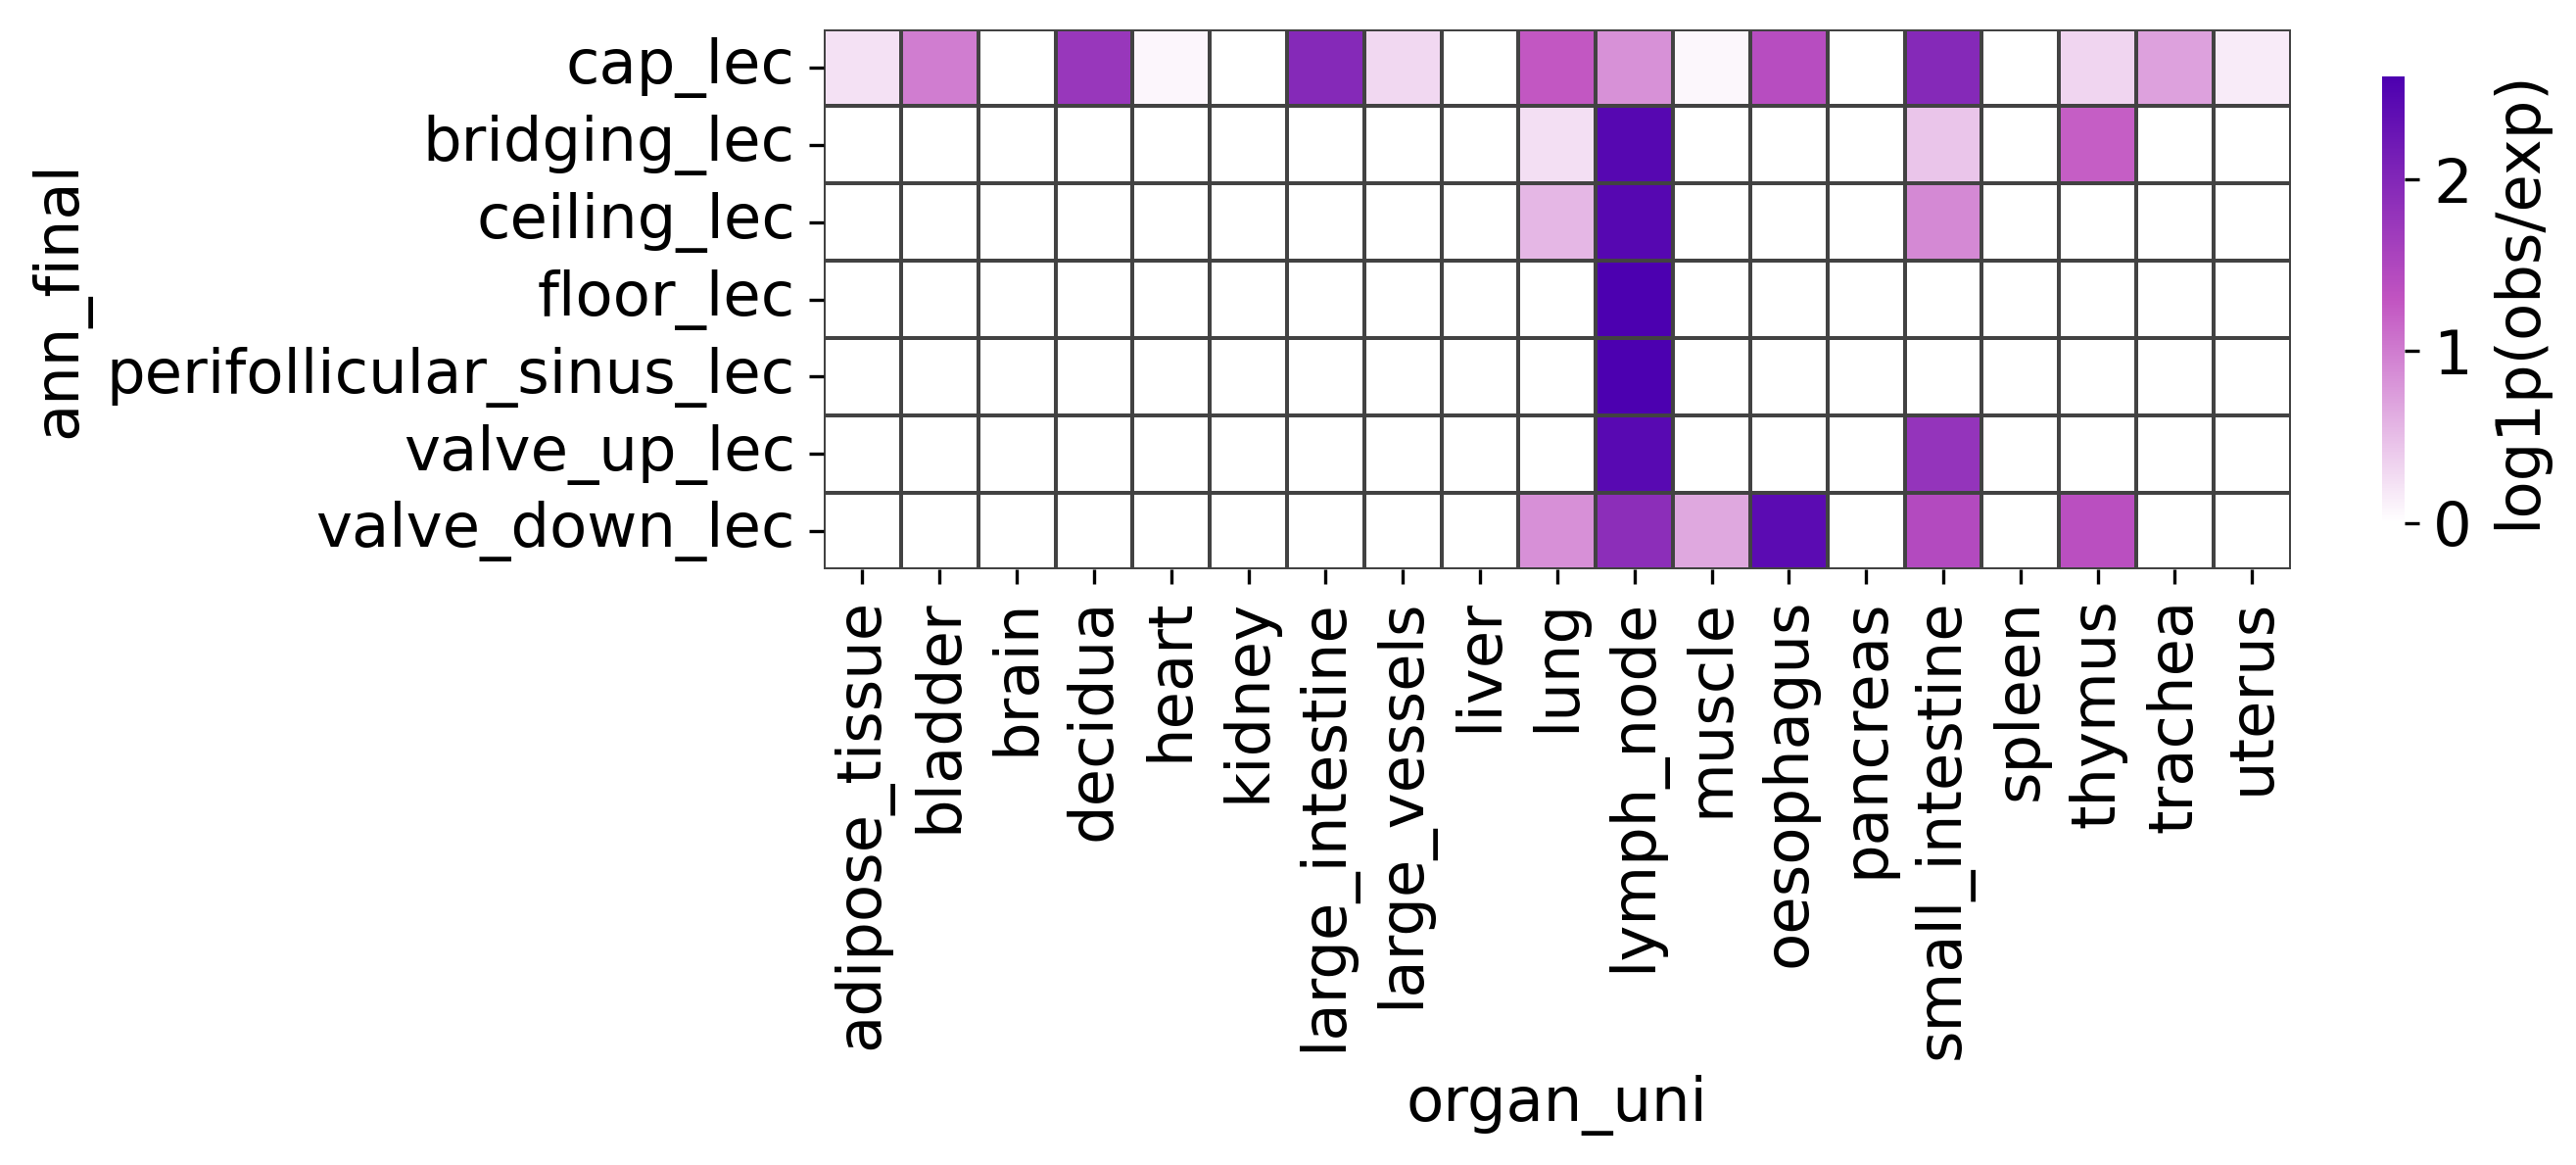

In [26]:
#organotypic art ec

from matplotlib.colors import ListedColormap

with rc_context({'figure.figsize': (8,8)}):
    sns.heatmap(df3,
                annot=False, fmt='g',
                square = True,
                cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['#ffffff', '#c154c1', '#4c00b0']),
                linewidths=0.5, linecolor='#424242',
                cbar_kws={"orientation": "vertical", "label": "log1p(obs/exp)", "shrink": 0.25})
    
    #plt.tick_params(axis='x', which='both', top=False, bottom=False, labeltop=False, labelbottom=False)
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['top'].set_edgecolor('black')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['bottom'].set_edgecolor('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['left'].set_edgecolor('black')
    ax.spines['right'].set_linewidth(2)
    ax.spines['right'].set_edgecolor('black')
    #ax.set_xticklabels([])
    
    plt.show()
    #plt.savefig('./figures/enrichment_ec_av_enrichment.png')

In [27]:
df4 = log1p_enrichment_table.loc[["aorta_coronary_smc","art_smc","brain_art_smc","pul_smc","uterine_smc","cap_pc","pul_pc","uterine_pc","smc_pc_intermediate","ven_smc"]]

In [28]:
df4

organ_uni,adipose_tissue,bladder,brain,decidua,heart,kidney,large_intestine,large_vessels,liver,lung,lymph_node,muscle,oesophagus,pancreas,small_intestine,spleen,thymus,trachea,uterus
ann_final,,,,,,,,,,,,,,,,,,,
aorta_coronary_smc,0.000000,0.000000,0.000000,0.000000,0.067588,0.000000,0.000000,3.370844,0.000000,0.181191,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
art_smc,0.697150,1.679644,1.207093,0.000000,0.411665,0.160799,0.812210,0.472707,0.000000,0.057449,0.317831,1.194090,0.48178,0.096220,0.796540,0.056703,0.887860,1.119250,1.135905
brain_art_smc,0.000000,0.318575,2.369245,0.127493,0.082883,0.000000,0.000000,0.390133,0.000000,0.330579,0.000000,0.043548,0.00000,0.000000,0.132243,0.000000,0.000000,0.000000,0.301750
pul_smc,0.000000,0.000000,0.808123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.214383,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
uterine_smc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.990854
cap_pc,0.830655,0.000000,0.000000,0.000000,1.336621,0.155452,0.135899,0.482149,0.187357,0.028980,0.152930,1.249470,0.00000,0.822294,0.082523,0.040609,0.757853,0.637970,1.176403
pul_pc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.323183,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
uterine_pc,0.000000,0.691786,0.000000,2.899902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.663283,1.670973
smc_pc_intermediate,0.426562,2.293667,0.437472,0.000000,0.298856,0.000000,0.000000,1.567558,0.000000,0.427564,0.543363,0.632447,1.27941,0.000000,0.000000,0.000000,1.921010,2.535338,0.449732


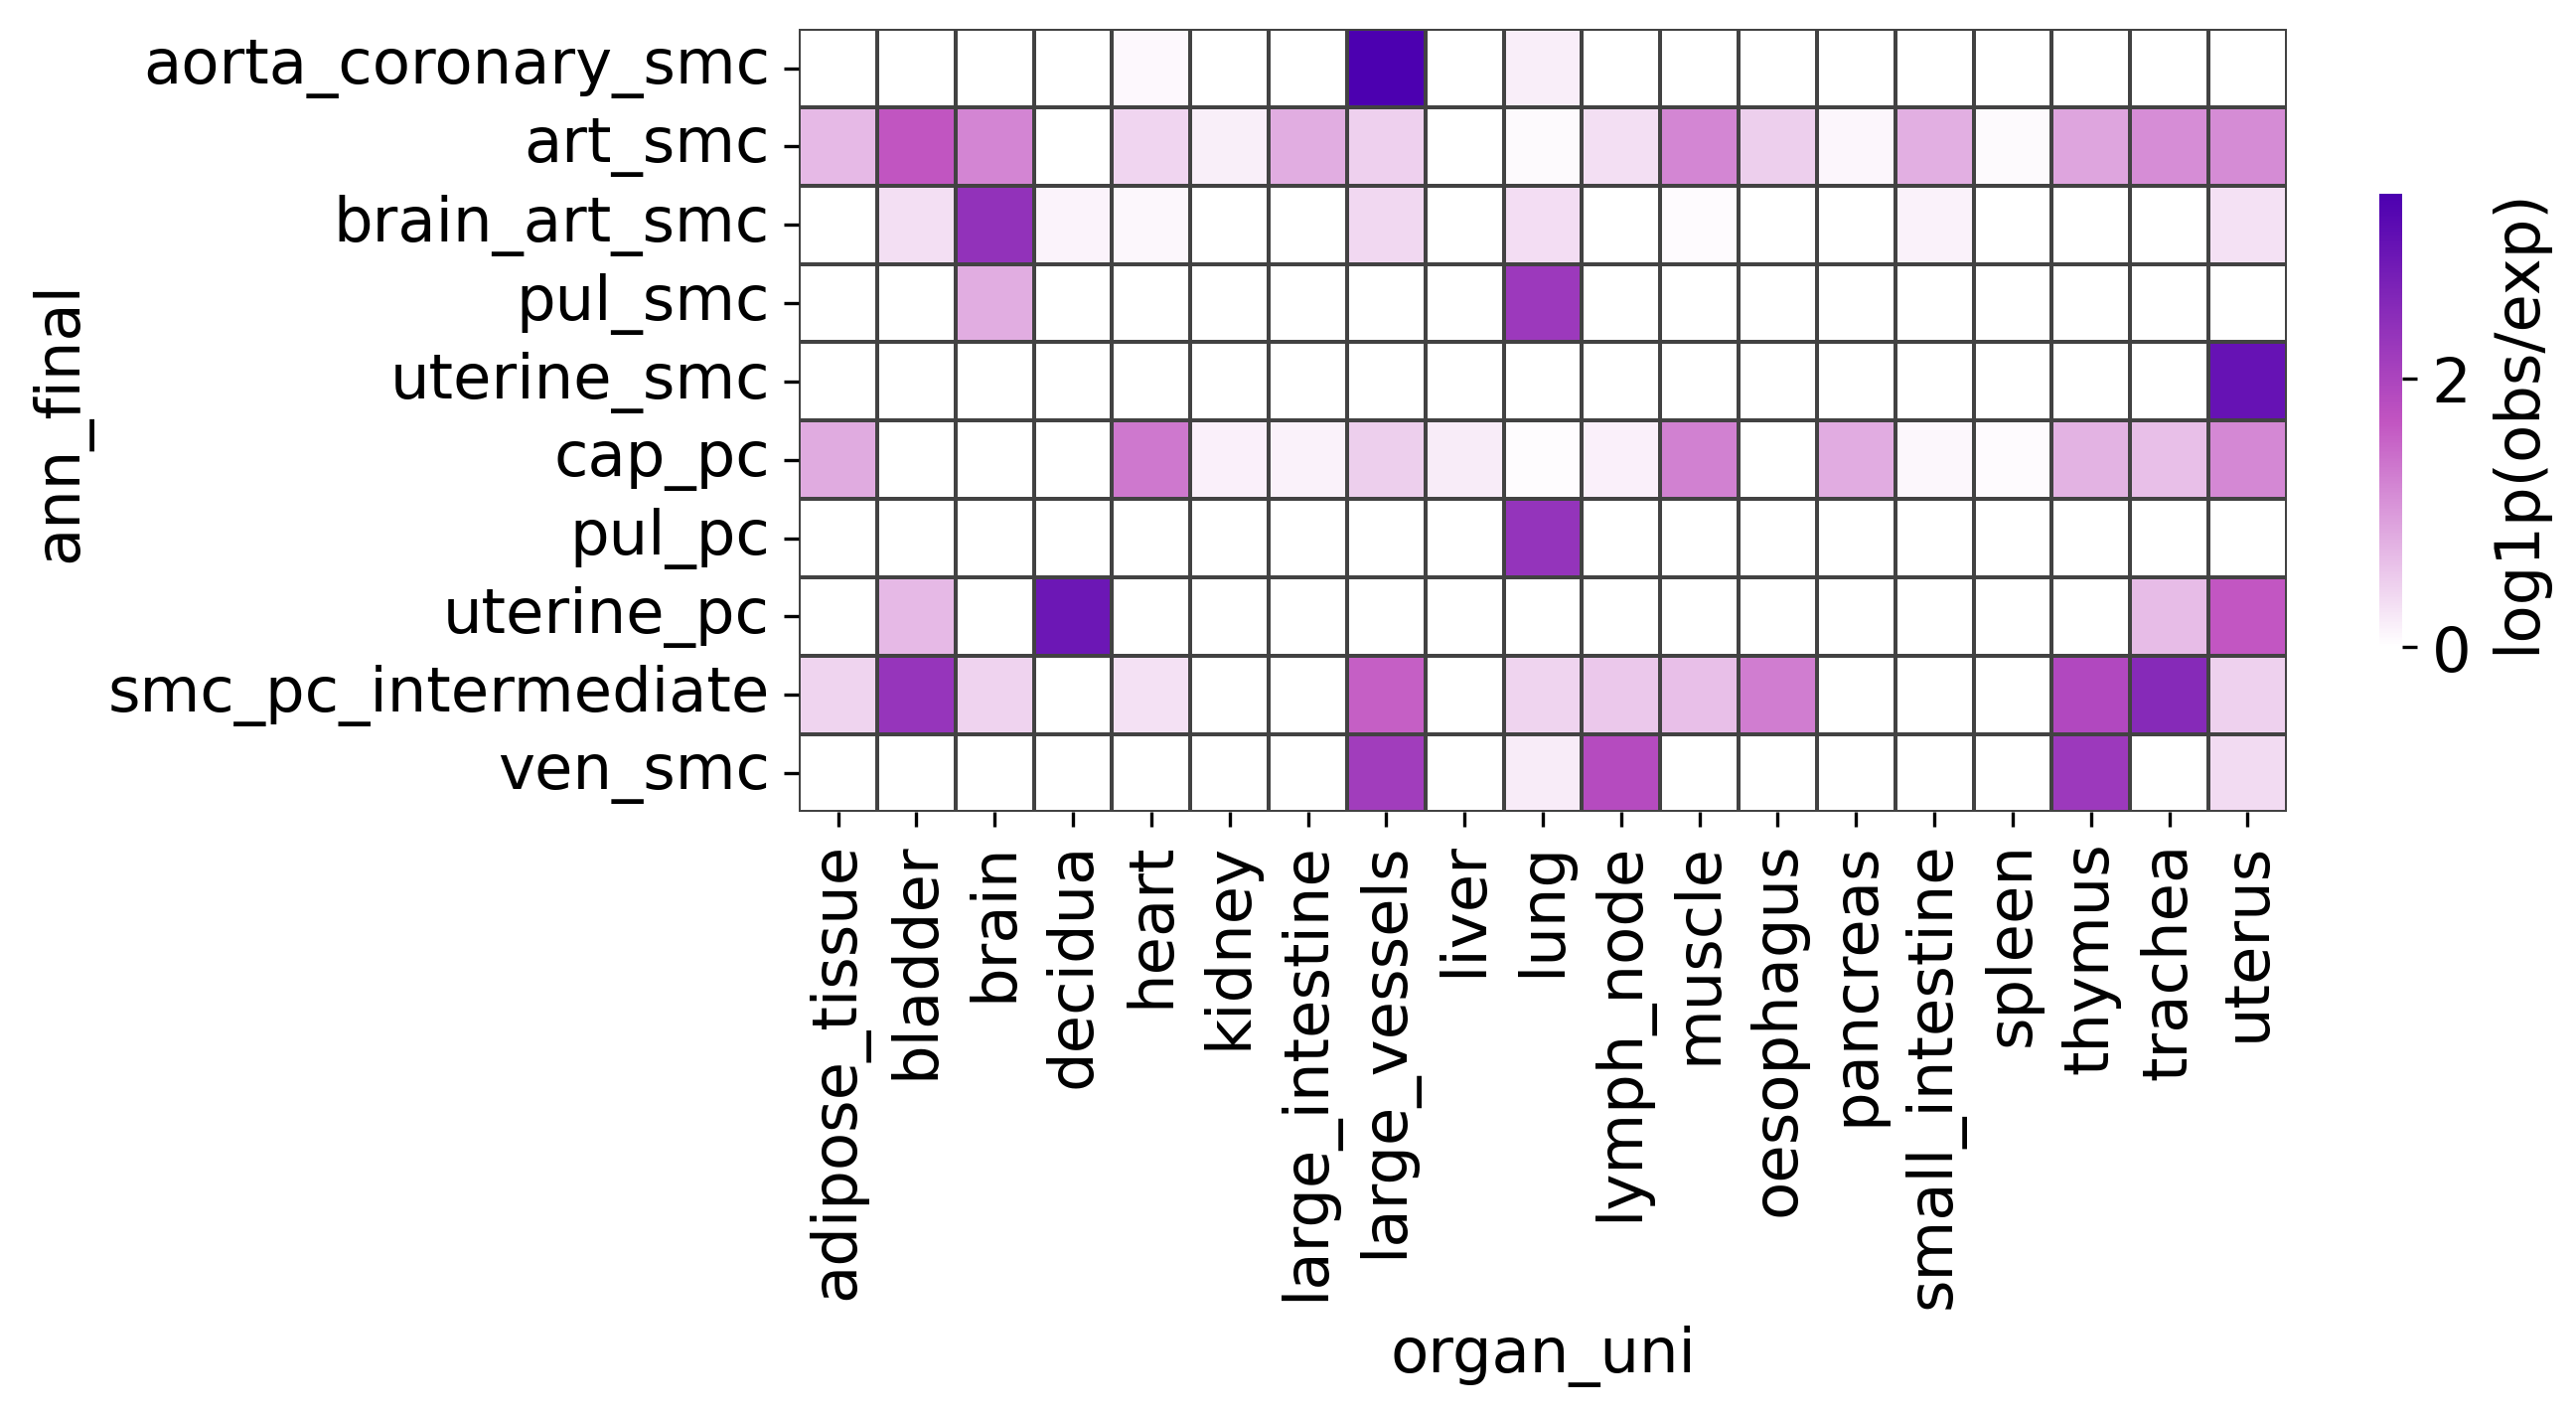

In [29]:
#organotypic art ec

from matplotlib.colors import ListedColormap

with rc_context({'figure.figsize': (8,8)}):
    sns.heatmap(df4,
                annot=False, fmt='g',
                square = True,
                cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['#ffffff', '#c154c1', '#4c00b0']),
                linewidths=0.5, linecolor='#424242',
                cbar_kws={"orientation": "vertical", "label": "log1p(obs/exp)", "shrink": 0.25})
    
    #plt.tick_params(axis='x', which='both', top=False, bottom=False, labeltop=False, labelbottom=False)
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['top'].set_edgecolor('black')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['bottom'].set_edgecolor('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['left'].set_edgecolor('black')
    ax.spines['right'].set_linewidth(2)
    ax.spines['right'].set_edgecolor('black')
    #ax.set_xticklabels([])
    
    plt.show()
    #plt.savefig('./figures/enrichment_ec_av_enrichment.png')